# 유가증권 수익률 계산

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

from pandas_datareader import data as pdr
import FinanceDataReader as fdr
import yfinance as yf
from pykrx import stock

# 함수

In [2]:
# 강사님 차트 함수
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
#     if nrows > 0:
#         print(df.head(nrows))
#     else:
#         print(df.tail(nrows))
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()


In [3]:
# 강사님 차트 함수
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d') 
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    
    plt.show()

In [4]:
def codefind(name):
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return

# 데이터 수집 
 ## - FinanceDataReader

In [5]:
# 연간변동률 구하기 위해 2년치 데이터 가져오기
df_ss = fdr.DataReader('005930','2018-01-01', '2019-12-31') # y_finanace와 차이점 발견, yf는 '005930.KS'

In [6]:
df_ss.drop(pd.to_datetime('2018-01-02'),inplace=True) # yfinance는 1/3부터 데이터가 있다.

In [7]:
df_ss.info()
df_ss

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2018-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    489 non-null    int64  
 1   High    489 non-null    int64  
 2   Low     489 non-null    int64  
 3   Close   489 non-null    int64  
 4   Volume  489 non-null    int64  
 5   Change  489 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 26.7 KB


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
2018-01-09,51460,51720,49980,50400,360272,-0.031142
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


In [8]:
df_ss.isna().sum().sum()

0

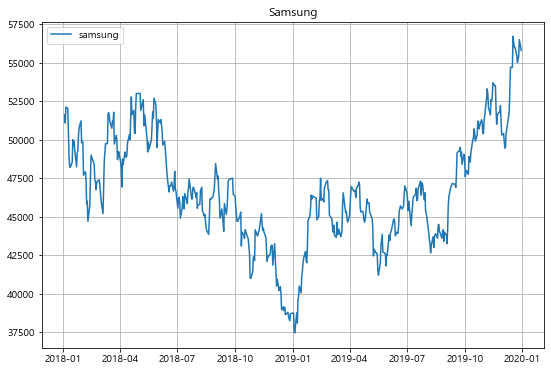

In [9]:
# 원자료(종가)로 그리지 않는다. 종가 그대로 출력하면 다른 상품과 비교하기 어렵다. 예) 애플(140달러) - 삼성(78000) 차트에서 비교 불가
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung')
plt.plot(df_ss.index, df_ss['Close'], label='samsung')
plt.grid()
plt.legend()

# 일간 변동률 계산

In [10]:
# FinanceDataReader에는 변동률이 들어있다. 0.011760 이나 (공식의 *100인) 1.176009 이나 값이 아닌 비율이기 때문에 같다.

# 변동률 계산방법 1
last_day = df_ss['Close'].shift(1)
today = df_ss['Close']
df_ss['Var_daily_price']= today - last_day
df_ss['Var_daily_ratio']= ((today- last_day)/last_day)*100

# 변동률 계산방법 2
df_ss['Var_daily_ratio2']= df_ss['Close'].pct_change(periods=1) * 100 

df_ss.head()

,Open,High,Low,Close,Volume,Change,Var_daily_price,Var_daily_ratio,Var_daily_ratio2
Date,,,,,,,,,
2018-01-03,52540,52560,51420,51620,200270,0.011760,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-540.0,-1.046106,-1.046106
2018-01-05,51300,52120,51200,52120,189623,0.020360,1040.0,2.036022,2.036022
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-100.0,-0.191865,-0.191865
2018-01-09,51460,51720,49980,50400,360272,-0.031142,-1620.0,-3.114187,-3.114187


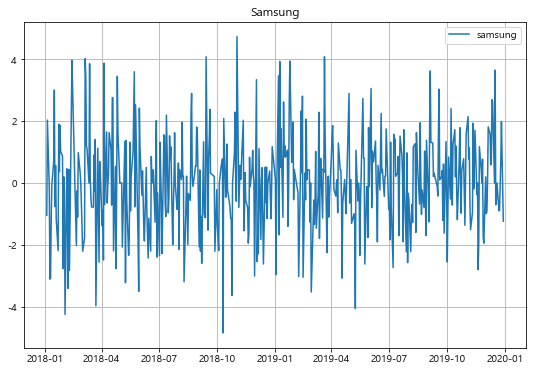

In [11]:
# 이렇게 변동률 자체로 그리지도 않는다. -> 누적합을 구해 추이를 봐야한다.
# 한주의 변동을 보려면 각 일자의 변동값을 모두 더하기 때문 (1 2 3 5 4)
# 5일씩 구한다 -> 5일의 평균을 구한다는 의미 -> [1 2 3 4 5]일 경우 평균 3을 기준으로 한다.

plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung')
plt.plot(df_ss.index, df_ss['Var_daily_ratio'], label='samsung')
plt.grid()
plt.legend()

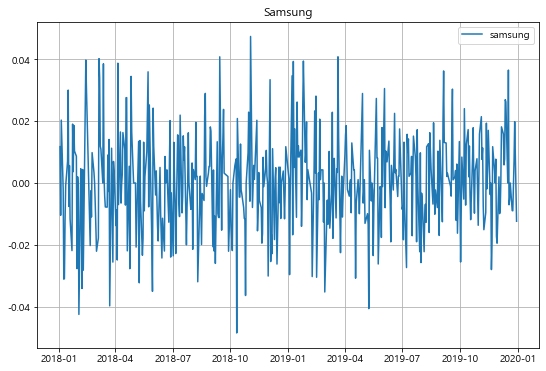

In [12]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung')
plt.plot(df_ss.index, df_ss['Change'], label='samsung')
plt.grid()
plt.legend()

# 주가 상승/하락 추이 확인

In [13]:
# 일간변동률 누적합
df_ss['Var_daily_ratio'].cumsum()[:5]

Date
2018-01-03         NaN
2018-01-04   -1.046106
2018-01-05    0.989916
2018-01-08    0.798051
2018-01-09   -2.316136
Name: Var_daily_ratio, dtype: float64

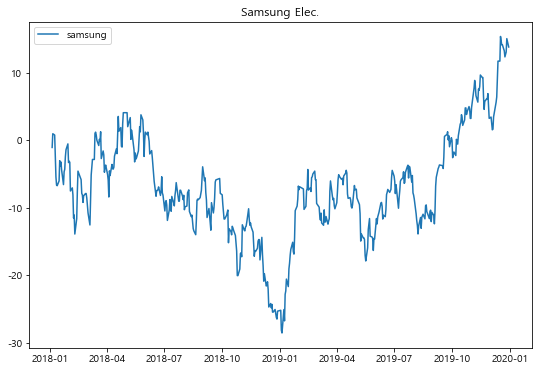

In [14]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung Elec.')
plt.plot(df_ss.index, df_ss['Var_daily_ratio'].cumsum(), label='samsung')
plt.legend()


### 이동평균선(이평선) 함수를 만든다.
 - N일의 주가지수의 평균 변동률
 - 이동평균선 : N일 동안의 주가의 평균 변동률을 이은 선

In [15]:
def daily_ratio(day=1): 
    df_ss['dayline_'+str(day)] = df_ss['Close'].rolling(day).mean()
    
# day: 5 => 5일 평균선인지. 
# 몇개씩 묶어와. 5개씩 묶어와 => rolling

In [16]:
df_ss

,Open,High,Low,Close,Volume,Change,Var_daily_price,Var_daily_ratio,Var_daily_ratio2
Date,,,,,,,,,
2018-01-03,52540,52560,51420,51620,200270,0.011760,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-540.0,-1.046106,-1.046106
2018-01-05,51300,52120,51200,52120,189623,0.020360,1040.0,2.036022,2.036022
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-100.0,-0.191865,-0.191865
2018-01-09,51460,51720,49980,50400,360272,-0.031142,-1620.0,-3.114187,-3.114187
...,...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929,-500.0,-0.892857,-0.892857
2019-12-24,55600,55700,54800,55000,11868463,-0.009009,-500.0,-0.900901,-0.900901
2019-12-26,54700,55400,54400,55400,9645034,0.007273,400.0,0.727273,0.727273


In [17]:
n_list = [3,5,10]
for n in n_list:
    daily_ratio(n)

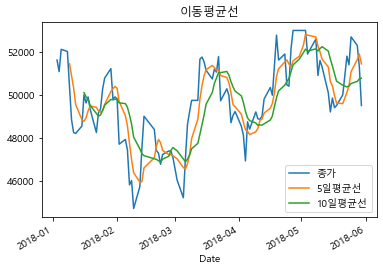

In [18]:
# myplot(df_ss[f'dayline_{5}']) # 5일 평균선
# myplot(df_ss[['Close','dayline_5','dayline_10']],title='이동평균선', labels=['종가','5일평균선','10일평균선']) 
# 100건만 가져오기
myplot(df_ss.iloc[:100][['Close','dayline_5','dayline_10']],title='이동평균선', labels=['종가','5일평균선','10일평균선']) 

In [19]:
# 이평선은 변동성이 완화된 것처럼 보인다.

### 이동변동가(지수)

In [20]:
def price_change(day=1): # 변동지수 / 가격변동
    df_ss[f'chg_{day}']= df_ss['Close'].pct_change(periods=day) * 100

In [21]:
n=3 # 3일치 (지금 기준, 이틀 전의 값 불러오기)
price_change(n)

In [22]:
df_ss.head()

,Open,High,Low,Close,Volume,Change,Var_daily_price,Var_daily_ratio,Var_daily_ratio2,dayline_3,dayline_5,dayline_10,chg_3
Date,,,,,,,,,,,,,
2018-01-03,52540,52560,51420,51620,200270,0.011760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-540.0,-1.046106,-1.046106,NaN,NaN,NaN,NaN
2018-01-05,51300,52120,51200,52120,189623,0.020360,1040.0,2.036022,2.036022,51606.666667,NaN,NaN,NaN
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-100.0,-0.191865,-0.191865,51740.000000,NaN,NaN,0.774893
2018-01-09,51460,51720,49980,50400,360272,-0.031142,-1620.0,-3.114187,-3.114187,51513.333333,51448.0,NaN,-1.331245


### 수익률 구하기
- 가격 변동을 보고, 오늘 기준으로 N일과 비교해서 증감 금액 구하기

### 보유기간수익률
- 투자자산을 보유한 기간동안 몇 %의 수익률을 올렸는지를 측정하는 것으로 단순한 성과 비교용으로 사용
- 보유기간수익률(%) = [{기말의 투자자산(매도가) / 기초의 투자자산(매수가)} -1 ] * 100

In [23]:
df_ss.index.max(), df_ss.index.min()

(Timestamp('2019-12-30 00:00:00'), Timestamp('2018-01-03 00:00:00'))

In [24]:
# # 보유기간수익률 1년 계산하기
# from datetime import datetime, timedelta
# start = pd.to_datetime('2018-01-02') # 1년: 252일로 가정 오늘날짜는 어떻게 구하는지
# today = start + timedelta(days=364)


In [25]:
# 강사님 코드 수정(강사님 노트북 확인 필요, 결과값이 다름 - 시작날짜가 다름)

start_price = int(df_ss.loc[df_ss.index.min(),'Close'])
today_price = int(df_ss.iloc[252:253]['Close']) # 강사님은 252:253인데 다른 이유?
print('기초 매수가',start_price)
print('기말 매도가',today_price)

보유기간수익률 = (today_price/start_price-1)*100
print(보유기간수익률)

기초 매수가 51620
기말 매도가 41100
-20.379697791553664


### 연간 보유기간 수익률 - 기하평균


In [26]:
# 블로그 예시로 보유기간 수익률 계산

기초투자금 = 5000  #3년전
연간배당금 = [250,300,400] # 1년차,2년차,3년차
기말투자금 = 5500

배당수익금 = np.sum(연간배당금)
보유기간수익률 = (배당수익금 + (기말투자금-기초투자금)) / 기초투자금
보유기간수익률 # 0.29  = 29%

0.29

### 기대수익률
- 기대수익률 = 호황 * 수익률 + 보통 * 수익률 + 불황 * 수익률

In [27]:
# parameter 호황 30% 보통 40% 불황 30%  / 예상주가 12000 10800 9600 / 수익률 20% 8% -4%
# 두 리스트 요소 연산하기 zip(리스트1,리스트2)

경기상황 = [30/100, 40/100, 30/100]
수익률 = [0.2,0.08,-0.04]
기대수익률 = np.sum([i * j for i, j in zip(경기상황, 수익률)])    
print(기대수익률)

0.08


In [28]:
# # 또는 for문
# 기대수익률 = 0
# for i in range(0,len(prices)):
#     기대수익률 = 기대수익률 + 경기상황[i] * 수익률[i]
# 기대수익률

In [29]:
# 또는 np.array np.dot ( 강사님 코드 보기편하게 수정 : 강사님 결과와 동일함. 근데 왜 0.33333? )

price = np.array([12000, 10800, 9600])
eco_rate = np.array([30/100 , 40/100 , 30/100])

price_sum = np.sum(price)
price_weight = np.array(price/price_sum)
# eco_rate = eco_rate.reshape(-1,1)
기대수익률 = np.dot(price_weight, eco_rate)
기대수익률

0.3333333333333333

In [30]:
price = [12000, 10800, 9600]
price_sum = np.array(price).sum()

price_weight = [12000/price_sum, 10800/price_sum, 9600/price_sum]
eco_rate = [30/100 , 40/100 , 30/100]


price_weight = np.array(price_weight)
eco_rate = np.array(eco_rate).reshape(-1,1)
기대수익률1 = np.dot(price_weight, eco_rate)

기대수익률2 = (eco_rate[0]*price_weight[0])  + (eco_rate[1]*price_weight[1])  + (eco_rate[2]*price_weight[2])
print(기대수익률1, 기대수익률2)

[0.33333333] [0.33333333]


### 가중평균수익률
- 개별 자산들을 하나로 묶은 전체 포트폴리오(주식, 채권, 부동산 등)의 수익률
- 각 자산별 기대수익률의 총 합

In [31]:
# 각 자산 기대수익률
# 투자대상 = [주식펀드,채권펀드,부동산투자신탁] / 기초투자금 = [4000,4000,2000,10000] / 기말투자금액 = [5000,4200,2200,11400]
# / 연간수익률 = (기말/기초-1)*100 = [25%,5%,10%,-] / 가중수익률 = 기초투자금액 * 연간수익률

# 정리하면
# 연간수익률 = ((기말/기초) -1) * 100
# 가중수익률 = 기초 * 연간수익률 = (기말 - 기초) * 100

In [32]:
기초투자금 = [4000,4000,2000,10000] 
기말투자금 = [5000,4200,2200,11400]
연말수익률 = [(j/i-1)*100 for i,j in zip(기초투자금,기말투자금)]
가중수익률 = [(j-i)*100 for i,j in zip(기초투자금,기말투자금)]
가중수익률

[100000, 20000, 20000, 140000]

In [33]:
연말수익률

[25.0, 5.000000000000004, 10.000000000000009, 13.99999999999999]

In [34]:
연말수익률 = [0.25, 0.05, 0.1, 0]
가중수익률 = [i*j/100 for i,j in zip(기초투자금,연말수익률)]
가중수익률

[10.0, 2.0, 2.0, 0.0]

# 변동계수

In [35]:
변동계수 = df_ss.loc['2018-01-03':,'Close'].std() / df_ss.loc['2018-01-03':,'Close'].mean()
변동계수

0.07742367927506001

In [36]:
df_ss.head()

,Open,High,Low,Close,Volume,Change,Var_daily_price,Var_daily_ratio,Var_daily_ratio2,dayline_3,dayline_5,dayline_10,chg_3
Date,,,,,,,,,,,,,
2018-01-03,52540,52560,51420,51620,200270,0.011760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,52120,52180,50640,51080,233909,-0.010461,-540.0,-1.046106,-1.046106,NaN,NaN,NaN,NaN
2018-01-05,51300,52120,51200,52120,189623,0.020360,1040.0,2.036022,2.036022,51606.666667,NaN,NaN,NaN
2018-01-08,52400,52520,51500,52020,167673,-0.001919,-100.0,-0.191865,-0.191865,51740.000000,NaN,NaN,0.774893
2018-01-09,51460,51720,49980,50400,360272,-0.031142,-1620.0,-3.114187,-3.114187,51513.333333,51448.0,NaN,-1.331245


# NN 모델 예측
 - 계산은 수익률

In [37]:
df_ss.isna().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
Change              0
Var_daily_price     1
Var_daily_ratio     1
Var_daily_ratio2    1
dayline_3           2
dayline_5           4
dayline_10          9
chg_3               3
dtype: int64

In [38]:
df_ss.drop(['Volume','Change','dayline_10','Var_daily_ratio2'], axis=1, inplace=True)

In [39]:
df_ss.dropna(axis=0,inplace=True)

In [40]:
y = df_ss['Close']
X = df_ss.drop('Close',axis=1)

In [41]:
X

,Open,High,Low,Var_daily_price,Var_daily_ratio,dayline_3,dayline_5,chg_3
Date,,,,,,,,
2018-01-09,51460,51720,49980,-1620.0,-3.114187,51513.333333,51448.0,-1.331245
2018-01-10,50500,50520,48640,-1560.0,-3.095238,50420.000000,50892.0,-6.293170
2018-01-11,48200,49260,48020,-600.0,-1.228501,49160.000000,50324.0,-7.266436
2018-01-12,48240,48480,46760,-40.0,-0.082919,48426.666667,49540.0,-4.365079
2018-01-15,48800,48980,47920,340.0,0.705394,48326.666667,48844.0,-0.614251
...,...,...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,-500.0,-0.892857,55833.333333,56100.0,-1.420959
2019-12-24,55600,55700,54800,-500.0,-0.900901,55500.000000,55760.0,-1.785714
2019-12-26,54700,55400,54400,400.0,0.727273,55300.000000,55580.0,-1.071429


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# X normalizing
X_scaled = scaler.fit_transform(X) 

In [43]:
# y normalizing
y.shape # 1차원
y= y.values.reshape(-1,1) # 2차원
y_scaled = scaler.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=336)

In [45]:
# y_train = y_train.flatten()
# y_test = y_test.flatten()

In [46]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(388, 8) (97, 8) (388, 1) (97, 1)


In [47]:
def my_dataset_window(xdata, ydata, window_size=5):
    window_size = 5
    xlist= []
    ylist = []
    # for i in range(train_scaler.shape[0] - window_size) :  #range(377)
    for i in range(window_size, xdata.shape[0]) :   #5,377   
        xvar = xdata[i-window_size: i]   #[0:5]  0,1,2,3,4
        yvar = ydata[i]    #Close
        xlist.append(xvar)
        ylist.append(yvar) 
    xlist = np.array(xlist)
    ylist = np.array(ylist)
    return xlist, ylist

X_train, y_train = my_dataset_window(X_train, y_train)
X_test, y_test = my_dataset_window(X_test, y_test)

In [48]:
print(X_train.shape)    
print(y_train.shape)  

(383, 5, 8)
(383, 1)


In [49]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout
# # 모델 생성
# model = Sequential()
# model.add(LSTM(10, activation='relu',
#                input_shape=(X_train.shape[1], X_train.shape[2])))  #(5,8)
# model.add(Dropout(0.1))
# model.add(Dense(1))
# model.summary()
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [50]:
# 모델 생성

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             11800     
_________________________________________________________________
dropout (Dropout)            (None, 5, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 60)             26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 60)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 80)             45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 80)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [51]:
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1, callbacks=[stop])

Epoch 1/200
22/22 [==============================] - 13s 149ms/step - loss: 0.1681 - mse: 0.1681 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2/200
22/22 [==============================] - 0s 18ms/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 3/200
22/22 [==============================] - 1s 25ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 5/200
22/22 [==============================] - 1s 23ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/200
22/22 [==============================] - 0s 20ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/200
22/22 [==============================] - 1s 24ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/200
22/22 [==============================] - 1s 25ms/step - loss: 

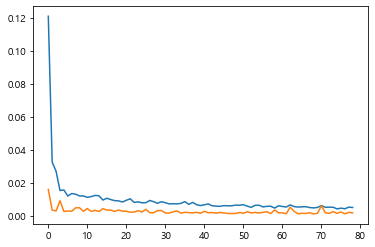

In [52]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label= 'val_loss')

In [53]:
pred = model.predict(X_test)

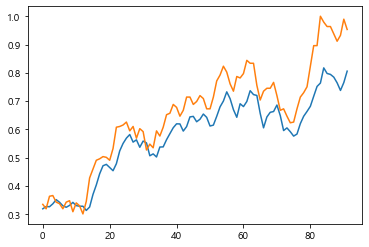

In [54]:
plt.plot(pred, label='pred')
plt.plot(y_test, label= 'y_test')